In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

#NLP libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

#Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Juhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Juhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv(r"Tweet_NFT.csv")

### Split Dataset into Train and Test rows

In [4]:
test_rows = df[df.isna().any(axis=1)]
test_rows

,id,tweet_text,tweet_created_at,tweet_intent
96364,1212764,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:35.000Z,NaN
96365,1212770,@asksabir007 @dao_lm Don't miss the chance to ...,2022-08-06T16:56:33.000Z,NaN
96366,1212773,This zesty faucet from @_bitcoiner is making m...,2022-08-06T16:56:33.000Z,NaN
96367,1212804,15% off ðŸ§™â€â™‚ï¸ #Wizardia NFTs - it's a ...,2022-08-06T16:56:23.000Z,NaN
96368,1212776,"@Kavaboy_NFT @tanya_4d Message me, letâ€™s tal...",2022-08-06T16:56:32.000Z,NaN
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN


In [5]:
# Using default Index
test_rows.reset_index(inplace = True, drop = True)

In [6]:
train_rows = df[~df.isna().any(axis=1)]
train_rows

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
96359,1424490,@nft_cryptogang @liuyan93721534 0x9fE808D8a9E2...,2022-08-11T23:11:58.000Z,Appreciation
96360,1424491,Just registered to win @cryptopunksnfts #1859 ...,2022-08-11T23:11:58.000Z,Presale
96361,1424494,"@SolSniffer Dyor on the nft collection ""Dictat...",2022-08-11T23:11:58.000Z,Appreciation
96362,1424497,#NFT #NFTCommmunity #DeltaFlare\nJoin me on Di...,2022-08-11T23:11:56.000Z,Community


## Exploratory Data Analysis

In [7]:
train_rows.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [8]:
train_rows.describe(include="all")

,id,tweet_text,tweet_created_at,tweet_intent
count,9.636400e+04,96364,96364,96364
unique,NaN,84908,47334,9
top,NaN,@Codex314159265 Feature it on @Globalnft07\nWe...,2022-08-11T10:57:24.000Z,Community
freq,NaN,381,24,41510
mean,1.313478e+06,NaN,NaN,NaN
std,6.365142e+04,NaN,NaN,NaN
min,1.212762e+06,NaN,NaN,NaN
25%,1.256854e+06,NaN,NaN,NaN
50%,1.309704e+06,NaN,NaN,NaN
75%,1.373360e+06,NaN,NaN,NaN


In [9]:
train_rows.shape

(96364, 4)

In [10]:
train_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96364 entries, 0 to 96363
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                96364 non-null  int64 
 1   tweet_text        96364 non-null  object
 2   tweet_created_at  96364 non-null  object
 3   tweet_intent      96364 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.7+ MB


In [11]:
train_rows.tweet_intent.value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

In [12]:
train_rows.duplicated().sum()

0

In [13]:
#percentage distribution of intents
train_rows.tweet_intent.value_counts()*100/len(df)

Community         32.568869
Giveaway          16.508831
Appreciation      12.907503
Whitelist          6.527897
Presale            4.006967
Done               2.392254
pinksale           0.374256
Interested         0.216550
Launching Soon     0.104352
Name: tweet_intent, dtype: float64

In [14]:
types = train_rows.tweet_intent.unique()
types

array(['Community', 'Giveaway', 'Appreciation', 'Presale', 'Whitelist',
       'pinksale', 'Done', 'Interested', 'Launching Soon'], dtype=object)

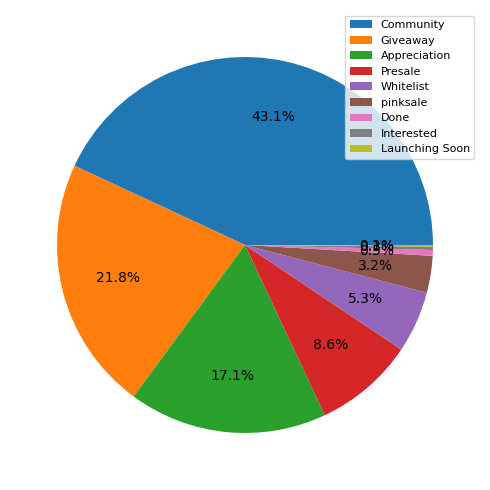

In [15]:
#Visualization of distribution
distribution = train_rows.tweet_intent.value_counts()*100/len(df)
fig = plt.figure(figsize =(6,5))
plt.pie(distribution,autopct='%1.1f%%',pctdistance=0.7)
plt.legend(types, loc='upper right', fontsize=8)
plt.tight_layout()

In [16]:
#checking for null values
train_rows.isna().sum()

id                  0
tweet_text          0
tweet_created_at    0
tweet_intent        0
dtype: int64

In [17]:
def cal_len(content):
    splitted_content = content.split()
    return len(splitted_content)

In [18]:
## Analyzing Number of words per review
train_rows['length'] = train_rows.tweet_text.apply(cal_len)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_24588\1865509375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rows['length'] = train_rows.tweet_text.apply(cal_len)


In [19]:
len_avg = {}
for items in types:
        avg = np.mean(train_rows.length[train_rows['tweet_intent']==items])
        len_avg[items] = avg

In [20]:
## Average length of each tweet intent
len_avg

{'Community': 23.359551915201155,
 'Giveaway': 27.195475500213867,
 'Appreciation': 17.854598504650173,
 'Presale': 14.16722146074016,
 'Whitelist': 31.700360576923078,
 'pinksale': 36.79245283018868,
 'Done': 8.513938996392259,
 'Interested': 27.242753623188406,
 'Launching Soon': 43.045112781954884}

<BarContainer object of 9 artists>

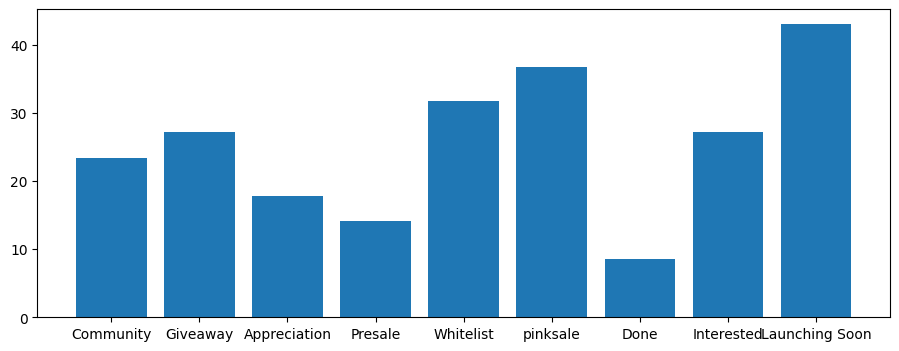

In [21]:
## Visualizing average length of each intent type 
plt.figure(figsize = (11, 4))
plt.bar(len_avg.keys(),len_avg.values())

In [22]:
## Median of length of tweet based on intent
len_median = {}
for items in types:
        avg = np.median(train_rows.length[train_rows['tweet_intent']==items])
        len_median[items] = avg

In [23]:
len_median

{'Community': 17.0,
 'Giveaway': 29.0,
 'Appreciation': 14.0,
 'Presale': 14.0,
 'Whitelist': 34.0,
 'pinksale': 36.0,
 'Done': 4.0,
 'Interested': 25.0,
 'Launching Soon': 43.0}

<BarContainer object of 9 artists>

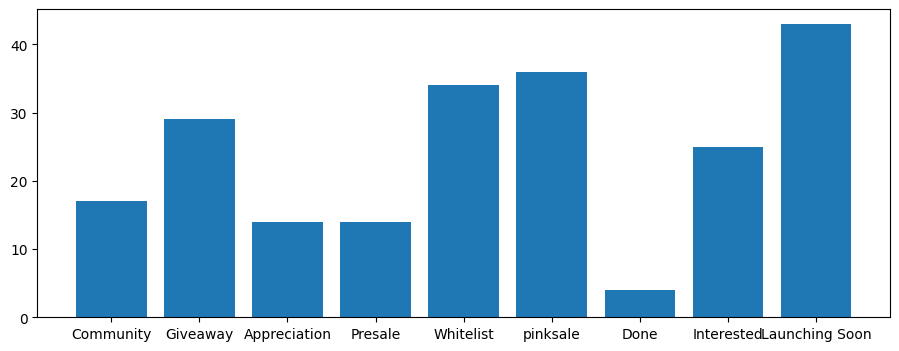

In [24]:
## Visualizing median of length of each intent type 
plt.figure(figsize = (11, 4))
plt.bar(len_median.keys(),len_median.values())

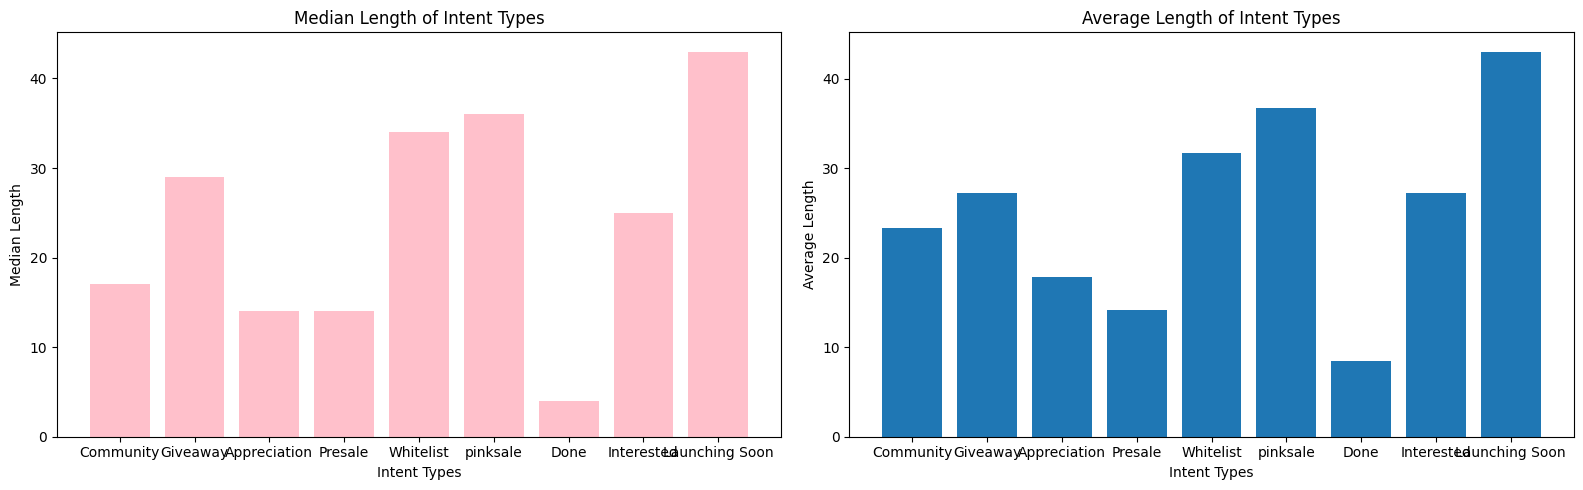

In [25]:
plt.figure(figsize=(16, 5))

#Visualizing median of length of each intent type
plt.subplot(1, 2, 1)
plt.bar(len_median.keys(),len_median.values(),color="pink")
plt.title('Median Length of Intent Types')
plt.xlabel('Intent Types')
plt.ylabel('Median Length')

#Visualizing average length of each intent type
plt.subplot(1, 2, 2)
plt.bar(len_avg.keys(),len_avg.values())
plt.title('Average Length of Intent Types')
plt.xlabel('Intent Types')
plt.ylabel('Average Length')

plt.tight_layout()
plt.show()

## Data Cleaning

In [26]:
#Removes noise
#This regex pattern essentially matches any character outside the ASCII range (characters with hexadecimal codes from 00 to 7F) and can be used to filter out non-ASCII characters, which are often considered noise.
#def remove_non_ascii(text):
#    return re.sub(r'[^\x00-\x7F]+', '', text)

In [27]:
## Function to clean the text
def clean_text(text):
    # remove twitter account handle
    text = re.sub("@([A-Za-z0-9_]{1,15})"," ", text)
    
    # remove URL
    url_clean= re.compile(r"https://\S+|www\.\S+")
    text=url_clean.sub(r'',text)
    
    # remove noise
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # remove numbers
    text = re.sub(r'\d+', ' ', text)
    
    # remove hashtags 
    text = re.sub(r'#\w+', ' ', text)
    
    # lower text
    text = text.strip().lower()
    
    # remove punctuation
    translator = str.maketrans(' ', ' ', string.punctuation)
    text = text.translate(translator)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    
    return text

In [28]:
train_rows['cleaned'] = train_rows['tweet_text'].apply(clean_text)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_24588\581168460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rows['cleaned'] = train_rows['tweet_text'].apply(clean_text)


### Word Tokenization

In [29]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

In [30]:
train_rows['tokenize'] = train_rows['cleaned'].apply(tokenize)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_24588\1377156054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rows['tokenize'] = train_rows['cleaned'].apply(tokenize)


In [31]:
train_rows.head()

,id,tweet_text,tweet_created_at,tweet_intent,length,cleaned,tokenize
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community,48,new cryptocurrency born fans chihuahua meme co...,"[new, cryptocurrency, born, fans, chihuahua, m..."
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway,25,need sick character art danimation dart,"[need, sick, character, art, danimation, dart]"
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation,12,great choice tesla good luck,"[great, choice, tesla, good, luck]"
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community,35,first project crypto move earn big things happ...,"[first, project, crypto, move, earn, big, thin..."
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community,34,first project crypto move earn big things happ...,"[first, project, crypto, move, earn, big, thin..."


#### Stemming
Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words “chocolates”, “chocolatey”, and “choco” to the root word.

In [32]:
port_stem = PorterStemmer()
def stemming(content):
    stemmed_content = [port_stem.stem(word) for word in content]
    return stemmed_content

In [33]:
train_rows['S_tokens'] = train_rows['tokenize'].apply(stemming)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_24588\2485092573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rows['S_tokens'] = train_rows['tokenize'].apply(stemming)


#### Lemming
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [34]:
lemmatizer = WordNetLemmatizer()
def lemming(content):
    lemmed_content = [lemmatizer.lemmatize(word) for word in content]
    return lemmed_content

In [35]:
train_rows['L_tokens'] = train_rows['tokenize'].apply(lemming)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_24588\2270764475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_rows['L_tokens'] = train_rows['tokenize'].apply(lemming)


#### Displaying WordCloud

(-0.5, 1599.5, 599.5, -0.5)

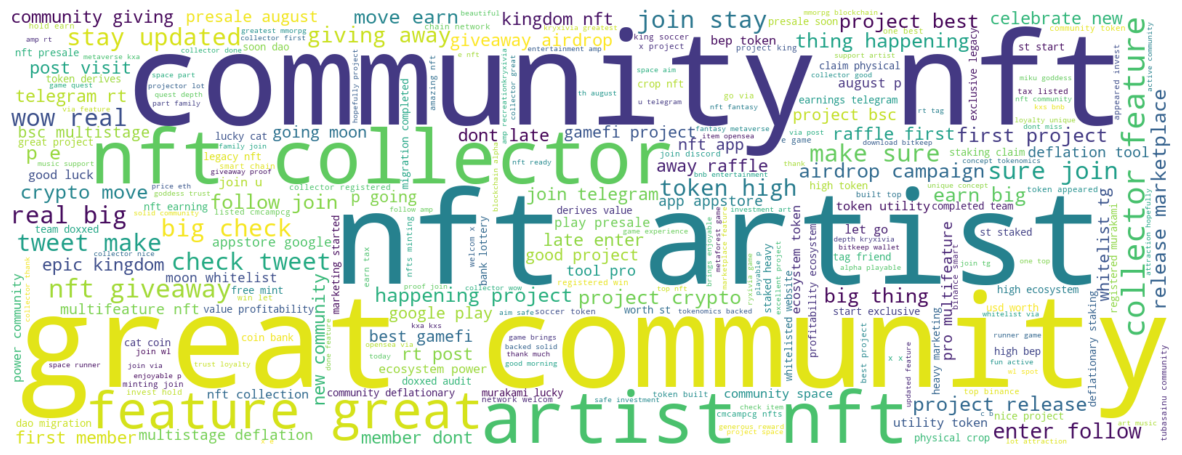

In [125]:
plt.figure(figsize=(15,15))
wc = WordCloud(max_words=1000, 
               min_font_size=10,
               height=600,
               width=1600,
               background_color='white',).generate(' '.join(train_rows.L_tokens.sum()))
plt.imshow(wc, interpolation= "bilinear")
plt.axis('off')

### Analyzing occurence of words having high frequency 
Words from wordcloud are analyzed for its occurence in each class label

In [36]:
def search(text,keyword):
    dic = {}
    for index,rows in text.iterrows():
        if keyword in rows['L_tokens']:
            intent = rows['tweet_intent']
            if intent in dic:
                dic[intent] += 1
            else:
                dic[intent] = 1
    return dic

In [37]:
search(train_rows[['L_tokens','tweet_intent']],"done")

{'Done': 2716,
 'Community': 62,
 'Giveaway': 451,
 'Whitelist': 20,
 'Appreciation': 203}

This indicates that out of 3049 values of Done class label, 2716 has occurence of word DONE in it

In [38]:
search(train_rows[['L_tokens','tweet_intent']],"community")

{'Community': 25256,
 'Giveaway': 2139,
 'Whitelist': 1061,
 'Interested': 23,
 'Appreciation': 16,
 'Launching Soon': 21,
 'pinksale': 1,
 'Done': 1}

In [39]:
search(train_rows[['L_tokens','tweet_intent']],"great")

{'Appreciation': 2985,
 'Community': 19947,
 'Giveaway': 1110,
 'Whitelist': 151,
 'Launching Soon': 2}

In [40]:
search(train_rows[['L_tokens','tweet_intent']],"nft")

{'Whitelist': 3954,
 'Community': 25381,
 'Giveaway': 6923,
 'Appreciation': 3443,
 'Done': 232,
 'Interested': 118,
 'Presale': 238,
 'Launching Soon': 16,
 'pinksale': 2}

Occurence of NFT can be found in maximum classes and evenly distributed based on class division, indicating it is of no significance in any of the class label

In [41]:
search(train_rows[['L_tokens','tweet_intent']],"whitelist")

{'Whitelist': 2331, 'Giveaway': 191}

In [42]:
search(train_rows[['L_tokens','tweet_intent']],"collector")

{'Community': 19574,
 'Giveaway': 129,
 'Appreciation': 80,
 'Whitelist': 101,
 'Presale': 3,
 'Done': 3,
 'Interested': 1}

## Train-Test Split

In [43]:
X = train_rows['L_tokens']
Y = train_rows['tweet_intent']

train_X,test_X,train_y,test_y = train_test_split(X,Y,test_size=0.3)

#### Label Encoding the output

In [44]:
le = LabelEncoder()
train_y = le.fit_transform(train_y.values)
test_y = le.transform(test_y.values)

#### TF-IDF vectorizer

In [45]:
def input_fun(text):
    return text

In [46]:
tfidf_vectorizer = TfidfVectorizer(lowercase=False,tokenizer=input_fun)
feature_train = tfidf_vectorizer.fit_transform(train_X)
feature_test = tfidf_vectorizer.transform(test_X)

C:\Python\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### Models

#### Logistic Regression

In [47]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(feature_train, train_y)
y_pred = logreg.predict(feature_test)

In [48]:
print('Model: Logistic Regression Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: Logistic Regression Accuracy: 0.8948460740228295


In [49]:
print("Classification Report",classification_report(y_pred,test_y))

Classification Report               precision    recall  f1-score   support

           0       0.90      0.86      0.88      5210
           1       0.95      0.90      0.93     13128
           2       0.86      0.87      0.86       883
           3       0.82      0.88      0.85      5954
           4       0.63      0.85      0.73        67
           5       0.94      0.97      0.96        35
           6       0.94      0.97      0.96      1474
           7       0.77      0.97      0.86      2010
           8       0.95      0.97      0.96       149

    accuracy                           0.89     28910
   macro avg       0.86      0.91      0.89     28910
weighted avg       0.90      0.89      0.90     28910



Given classification report indicates that the model is unable to classify accurately for all classes

#### Naive Bayes

In [50]:
NB = MultinomialNB()
NB.fit(feature_train, train_y)
y_pred = NB.predict(feature_test)

In [51]:
print('Model: Naive Bayes Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: Naive Bayes Accuracy: 0.8272570044967139


#### Random Forest Classifier

In [52]:
rf = RandomForestClassifier()
rf.fit(feature_train,train_y)
y_pred = rf.predict(feature_test)

In [53]:
print('Model: Random Forest Classifier Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: Random Forest Classifier Accuracy: 0.9178830854375648


In [54]:
print("Classification Report",classification_report(y_pred,test_y))

Classification Report               precision    recall  f1-score   support

           0       0.95      0.88      0.92      5332
           1       0.96      0.92      0.94     12919
           2       0.93      0.86      0.90       978
           3       0.84      0.92      0.88      5811
           4       0.92      0.86      0.89        96
           5       0.94      0.97      0.96        35
           6       0.96      0.97      0.97      1508
           7       0.79      0.96      0.87      2077
           8       0.99      0.97      0.98       154

    accuracy                           0.92     28910
   macro avg       0.92      0.93      0.92     28910
weighted avg       0.92      0.92      0.92     28910



Random forest algorithm gives high precision for almost all the class labels

#### SGD Classifier

In [55]:
sgd = SGDClassifier(loss="log") ## using logisitic regression
sgd.fit(feature_train,train_y)
y_pred = sgd.predict(feature_test)

C:\Python\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [56]:
print('Model: SGD Classifier(using Logisitc Regression) Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: SGD Classifier(using Logisitc Regression) Accuracy: 0.8658941542718782


In [57]:
sgd = SGDClassifier(loss="hinge") ## using SVM
sgd.fit(feature_train,train_y)
y_pred = sgd.predict(feature_test)

In [58]:
print('Model: SGD Classifier(using SVM) Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: SGD Classifier(using SVM) Accuracy: 0.8919405050155655


#### Linear SVM

In [59]:
svc = LinearSVC()
svc.fit(feature_train,train_y)
y_pred = svc.predict(feature_test)

In [60]:
print('Model: Linear SVM Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: Linear SVM Accuracy: 0.8974403320650294


In [61]:
print("Classification Report",classification_report(y_pred,test_y))

Classification Report               precision    recall  f1-score   support

           0       0.90      0.84      0.87      5313
           1       0.94      0.91      0.93     12763
           2       0.90      0.86      0.88       944
           3       0.83      0.88      0.86      5974
           4       0.77      0.83      0.80        83
           5       0.94      0.97      0.96        35
           6       0.96      0.96      0.96      1516
           7       0.80      0.95      0.86      2132
           8       0.96      0.97      0.96       150

    accuracy                           0.90     28910
   macro avg       0.89      0.91      0.90     28910
weighted avg       0.90      0.90      0.90     28910



High precision is observed for all outputs of different classes

### Hyperparameter Tuning

In [92]:
def find_best_model_using_gridsearchcv(X,Y):
    algos={
        #'Random Forest':{
        #   "model":RandomForestClassifier(),
          #  "params" : {
           #'n_estimators': [100, 200, 500],
            #    'max_depth': [None, 5, 10],
             #   'min_samples_split': [2, 5, 10]
              #  }
        #},
        
        'SVC':{
            "model":SVC(),
            "params":{
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf', 'poly']
                }
        },

        'Logistic Regression':{
                "model":LogisticRegression(),
                 "params":{
                    'C': [0.1, 1, 10],
                    'penalty': ['l1', 'l2']
                    }
        }
    }

    scores=[]
    for algo_name,config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=5,return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [ ]:
find_best_model_using_gridsearchcv(feature_train,train_y)

### TF-IDF vectorizer + N-grams

In [62]:
tfidf_vectorizer_n_grams = TfidfVectorizer(max_features = 1000,lowercase=False,tokenizer=input_fun,ngram_range=(1,2))
feature_train_n_grams = tfidf_vectorizer_n_grams.fit_transform(train_X)
feature_test_n_grams = tfidf_vectorizer_n_grams.transform(test_X)

C:\Python\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Logistic Regression

In [63]:
lr = LogisticRegression(max_iter=1000)
lr.fit(feature_train_n_grams, train_y)
y_pred = lr.predict(feature_test_n_grams)

In [64]:
print('Model: Logistic Regression(bi-grams) Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: Logistic Regression(bi-grams) Accuracy: 0.875752334832238


#### Linear SVM

In [65]:
svm = LinearSVC()
svm.fit(feature_train_n_grams,train_y)
y_pred = svm.predict(feature_test_n_grams)

In [66]:
print('Model: Linear SVM(bi-grams) Accuracy: %s' % accuracy_score(y_pred, test_y))

Model: Linear SVM(bi-grams) Accuracy: 0.8776202006226219


#### Conclusion : Tf-Idf with bi-grams to save context doesn't improve accuracy

## Steps to be performed on Input Data

In [97]:
def preprocess_predict(text):
    text = clean_text(text)
    tokens = tokenize(text)
    l_tokens = lemming(tokens)
    #print(l_tokens)
    if l_tokens == []:
        return "Community"
    else:
        vector = tfidf_vectorizer.transform(l_tokens)
        output = []
        output.append(le.inverse_transform(rf.predict(vector))[0])
        output.append(le.inverse_transform(svc.predict(vector))[0])
        output.append(le.inverse_transform(logreg.predict(vector))[0])
        y_out = mode(output) 
        return y_out

In [98]:
preprocess_predict("whitelist")

'Community'

## Output Prediction

In [101]:
test_rows['tweet_intent'] = test_rows['tweet_text'].apply(preprocess_predict)

C:\Users\Juhi\AppData\Local\Temp\ipykernel_24588\280275859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_rows['tweet_intent'] = test_rows['tweet_text'].apply(preprocess_predict)


### Distribution of predicted Values

In [102]:
test_rows.tweet_intent.value_counts()

Community       18940
Giveaway        11707
Appreciation      420
Whitelist          20
Presale             2
Name: tweet_intent, dtype: int64

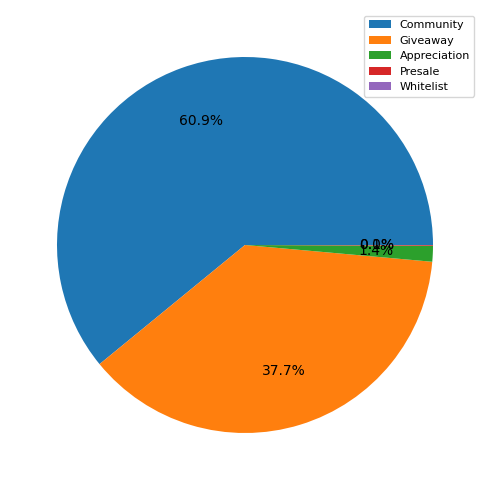

In [103]:
#Visualization of distribution
distribution = test_rows.tweet_intent.value_counts()*100/len(df)
fig = plt.figure(figsize =(6,5))
plt.pie(distribution,autopct='%1.1f%%',pctdistance=0.7)
plt.legend(types, loc='upper right', fontsize=8)
plt.tight_layout()

### Pickling

In [104]:
import pickle

In [105]:
with open('rfl.pkl', 'wb') as rf_model_file:
    pickle.dump(rf, rf_model_file)

In [106]:
with open('svc.pkl', 'wb') as svc_model_file:
    pickle.dump(svc, svc_model_file)

In [107]:
with open('lr.pkl', 'wb') as lr_model_file:
    pickle.dump(logreg, lr_model_file)

In [108]:
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

In [109]:
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(le, encoder_file)